<a href="https://colab.research.google.com/github/Brian13Noble/GIS/blob/main/Copy_of_ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok: code breaks!! so i cannot check it!! but from presentation: cool map; do look at longer time periods like over 10,20,50 yrs; can also look at smaller units, say counties! and can look at different types of population say by national orign

The Purpose of the research:
The world has experienced many challenges in the recent past that have contributed to a significant shift in population. Despite being one of the most populated countries in the world, the United States was also hit by the covid-19 pandemic, which led to population changeas across the major states. Additionally, other factors like abortion could also play part in the dynamic shift of the US population. The purpose of the study is to investigate the population changes in the United States between 2021 and 2022        

In [59]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis
!pip install geopandas matplotlib folium

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [60]:
!pip install mapclassify
import mapclassify #need for thematic map classification

cb_2018_us_state_20m.cpg  cb_2018_us_state_20m.shp.ea.iso.xml  sample_data
cb_2018_us_state_20m.dbf  cb_2018_us_state_20m.shp.iso.xml     US_States.zip
cb_2018_us_state_20m.prj  cb_2018_us_state_20m.shx
cb_2018_us_state_20m.shp  cb_2018_us_state_20m.zip


<Axes: >

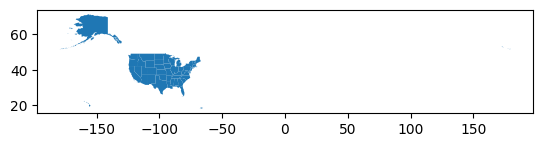

In [61]:
#Mapping the area of interest
! wget -q -O US_States.zip 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip' #aok: error: was nj_counties
!ls
zip_ref = zipfile.ZipFile('/content/cb_2018_us_state_20m.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping
US_States=gpd.read_file('/content/cb_2018_us_state_20m.shp') #load the shapefile with gpd as United_States
#Make the map
US_States.plot()

In [62]:
US_States.head(1)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."


In [63]:
#Loading the excel data
df = 'https://www2.census.gov/programs-surveys/popest/datasets/2020-2022/state/totals/NST-EST2022-ALLDATA.csv'#aok nooooo! i dont have this!!! error!!! need to download with wget
df = pd.read_csv(df)
df.dtypes





SUMLEV                     int64
REGION                    object
DIVISION                  object
STATE                      int64
NAME                      object
ESTIMATESBASE2020          int64
POPESTIMATE2020            int64
POPESTIMATE2021            int64
POPESTIMATE2022            int64
NPOPCHG_2020               int64
NPOPCHG_2021               int64
NPOPCHG_2022               int64
BIRTHS2020                 int64
BIRTHS2021                 int64
BIRTHS2022                 int64
DEATHS2020                 int64
DEATHS2021                 int64
DEATHS2022                 int64
NATURALCHG2020             int64
NATURALCHG2021             int64
NATURALCHG2022             int64
INTERNATIONALMIG2020       int64
INTERNATIONALMIG2021       int64
INTERNATIONALMIG2022       int64
DOMESTICMIG2020            int64
DOMESTICMIG2021            int64
DOMESTICMIG2022            int64
NETMIG2020                 int64
NETMIG2021                 int64
NETMIG2022                 int64
RESIDUAL20

In [ ]:
df= df[['NAME','POPESTIMATE2020','POPESTIMATE2022']]
df= df.iloc[1:,:]

df = df[~df['NAME'].isin(['Northeast Region', 'New England', 'South Region', 'West South Central', 'Pacific','Mountain', 'West Region', 'West North Central',
                          'East South Central', 'West South Central' 'South Region',
                          'South Atlantic', 'East North Central', 'Middle Atlantic',
                          'Midwest Region', 'Hawaii', 'Puerto Rico'])]
df['POPCHANGE'] = (df['POPESTIMATE2022'] - df['POPESTIMATE2020'])  / df['POPESTIMATE2022'] * 100
print(df)

                    NAME  POPESTIMATE2020  POPESTIMATE2022  POPCHANGE
15                Alaska           732923           733583   0.089969
16               Arizona          7179943          7359197   2.435782
17              Arkansas          3014195          3045637   1.032362
18            California         39501653         39029342  -1.210143
19              Colorado          5784865          5839926   0.942837
20           Connecticut          3597362          3626205   0.795405
21              Delaware           992114          1018396   2.580725
22  District of Columbia           670868           671803   0.139178
23               Florida         21589602         22244823   2.945499
24               Georgia         10729828         10912876   1.677358
26                 Idaho          1849202          1939033   4.632773
27              Illinois         12786580         12582032  -1.625715
28               Indiana          6788799          6833037   0.647413
29                  

In [ ]:
df


,NAME,POPESTIMATE2020,POPESTIMATE2022,POPCHANGE
14,Alabama,5031362,5074296,0.846108
15,Alaska,732923,733583,0.089969
16,Arizona,7179943,7359197,2.435782
17,Arkansas,3014195,3045637,1.032362
18,California,39501653,39029342,-1.210143
19,Colorado,5784865,5839926,0.942837
20,Connecticut,3597362,3626205,0.795405
21,Delaware,992114,1018396,2.580725
22,District of Columbia,670868,671803,0.139178
23,Florida,21589602,22244823,2.945499


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 15 to 64
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             49 non-null     object 
 1   POPESTIMATE2020  49 non-null     int64  
 2   POPESTIMATE2022  49 non-null     int64  
 3   POPCHANGE        49 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
#United_States = pd.merge(United_States, df, on='State_Name', how='outer', indicator=True)
print (US_States['NAME'])


0                 Maryland
1                     Iowa
2                 Delaware
3                     Ohio
4             Pennsylvania
5                 Nebraska
6               Washington
7              Puerto Rico
8                  Alabama
9                 Arkansas
10              New Mexico
11                   Texas
12              California
13                Kentucky
14                 Georgia
15               Wisconsin
16                  Oregon
17                Missouri
18                Virginia
19               Tennessee
20               Louisiana
21                New York
22                Michigan
23                   Idaho
24                 Florida
25                  Alaska
26                Illinois
27                 Montana
28               Minnesota
29                 Indiana
30           Massachusetts
31                  Kansas
32                  Nevada
33                 Vermont
34             Connecticut
35              New Jersey
36    District of Columbia
3

In [ ]:
US_States = pd.merge(
    left=US_States,
    right=df,
    left_on='NAME',
    right_on='NAME',
    how='outer'
)
print(US_States.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   STATEFP            52 non-null     object  
 1   STATENS            52 non-null     object  
 2   AFFGEOID           52 non-null     object  
 3   GEOID              52 non-null     object  
 4   STUSPS             52 non-null     object  
 5   NAME               52 non-null     object  
 6   LSAD               52 non-null     object  
 7   ALAND              52 non-null     int64   
 8   AWATER             52 non-null     int64   
 9   geometry           52 non-null     geometry
 10  POPESTIMATE2020_x  49 non-null     float64 
 11  POPESTIMATE2022_x  49 non-null     float64 
 12  POPCHANGE_x        49 non-null     float64 
 13  POPESTIMATE2020_y  49 non-null     float64 
 14  POPESTIMATE2022_y  49 non-null     float64 
 15  POPCHANGE_y        49 non-null     float64 
dtypes:

<Axes: title={'center': 'Population Change in the U.S.A Between 2020 and 2022'}>

<Axes: >

Text(0.5, 1.0, 'Population Change in the U.S.A Between 2020 and 2022')

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 640x480 with 0 Axes>

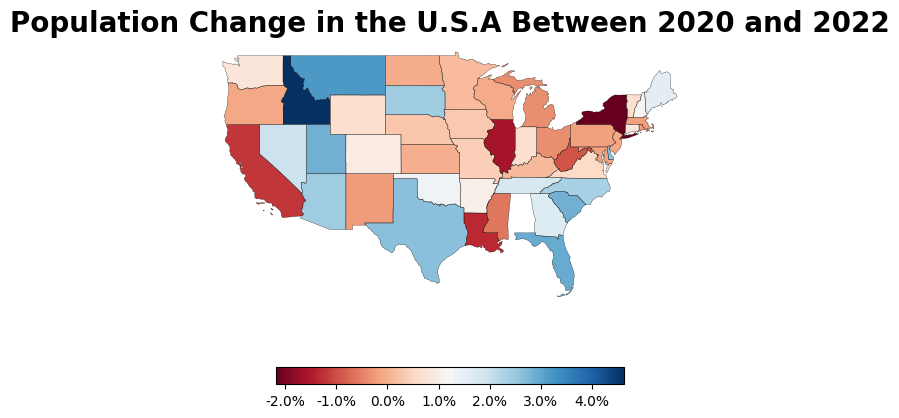

In [ ]:
from tables.table import Column
#ax = US_States.boundary.plot()
US_States.plot(ax=ax, column='POPCHANGE_x')
#plt.show
US_States = US_States.dropna()
US_States = US_States[~US_States['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]
ax = US_States.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(15, 5))
US_States.plot(ax=ax, column='POPCHANGE_x', legend=True, cmap='RdBu', legend_kwds={'shrink':0.3,
 'orientation': 'horizontal', 'format': '%.1f%%'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Population Change in the U.S.A Between 2020 and 2022', size=20, weight='bold')
plt.show

**Interpretation**

 The map shows that Florida and Idaho were the leading countries that recorded the highest population increase between 2021 and 2022, which was slight above 1.5%. Alternatively, New York, Illinois and Lousiana experienced a significant decline in population in the United States. A further investigation is, therefore, necessary to establish the reasons behind the rise and fall of population among the respective states.

 **Resources:**
https://www.census.gov/data/datasets/time-series/demo/popest/2020s-national-total.html

https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html